In [ ]:
import keras
import numpy as np
from keras.utils import np_utils

In [ ]:
keras.__version__
np.random.seed(10)

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [ ]:
print('train data=',len(x_train_image))
print('test data=',len(x_test_image))

In [ ]:
print('y_train_label',x_train_image.shape)
print('y_train_label',y_train_label.shape)

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig=plt.figure(figsize=(4,4))
    plt.imshow(image,cmap='binary')
    plt.show()

In [ ]:
plot_image(x_train_image[0])

In [ ]:
y_train_label[0]

In [ ]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    flig=plt.figure(figsize=(12,14))
    if num>25:
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='labels='+str(labels[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

In [ ]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,7)

In [ ]:
print('x_test_image:',x_test_image.shape)
print('y_test_label:',y_test_label.shape)

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,7)

In [ ]:
x_train=x_train_image.reshape(60000,-1).astype('float32')
x_test=x_test_image.reshape(10000,-1).astype('float32')
print(x_train.shape)
print(x_test.shape)

In [ ]:
x_train[0]

In [ ]:
x_train_normalize=x_train/255
x_test_normalize=x_test/255

In [ ]:
x_train_normalize[0]

In [ ]:
y_train_label[:5]

In [ ]:
y_train_oneHot=np_utils.to_categorical(y_train_label)
y_test_oneHot=np_utils.to_categorical(y_test_label)

In [ ]:
y_train_oneHot[:5]

In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [41]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
train_history=model.fit(x_train_normalize,y_train_oneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.0570 - acc: 0.9821 - val_loss: 0.0800 - val_acc: 0.9778
Epoch 2/10
 - 2s - loss: 0.0502 - acc: 0.9838 - val_loss: 0.0801 - val_acc: 0.9794
Epoch 3/10
 - 2s - loss: 0.0449 - acc: 0.9848 - val_loss: 0.0740 - val_acc: 0.9811
Epoch 4/10
 - 2s - loss: 0.0439 - acc: 0.9863 - val_loss: 0.0753 - val_acc: 0.9815
Epoch 5/10
 - 2s - loss: 0.0402 - acc: 0.9869 - val_loss: 0.0756 - val_acc: 0.9818
Epoch 6/10
 - 2s - loss: 0.0418 - acc: 0.9868 - val_loss: 0.0823 - val_acc: 0.9800
Epoch 7/10
 - 2s - loss: 0.0399 - acc: 0.9868 - val_loss: 0.0738 - val_acc: 0.9816
Epoch 8/10
 - 2s - loss: 0.0372 - acc: 0.9877 - val_loss: 0.0834 - val_acc: 0.9793
Epoch 9/10
 - 2s - loss: 0.0373 - acc: 0.9881 - val_loss: 0.0789 - val_acc: 0.9807
Epoch 10/10
 - 2s - loss: 0.0339 - acc: 0.9886 - val_loss: 0.0780 - val_acc: 0.9819


In [55]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train histiry')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train,','validation'],loc='upper left')
    plt.show()

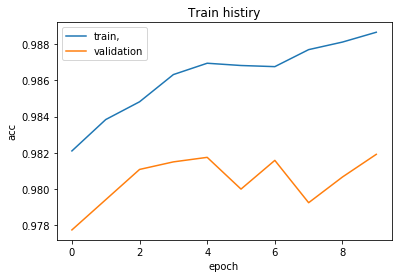

In [56]:
show_train_history(train_history,'acc','val_acc')

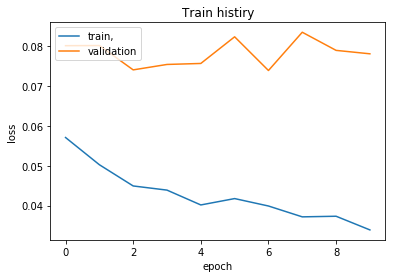

In [46]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores=model.evaluate(x_test_normalize,y_test_oneHot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 65us/step
accuracy= 0.983


In [48]:
prediction=model.predict_classes(x_test)

In [49]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

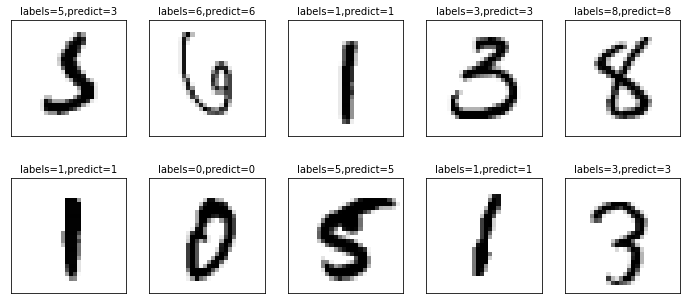

In [50]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [51]:
#混淆矩阵
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,1,0,1,1,1,1,1
1,0,1130,2,0,0,1,2,0,0,0
2,2,0,1020,3,1,0,1,5,0,0
3,0,0,8,990,0,3,0,1,1,7
4,1,0,2,0,971,0,4,1,0,3
5,2,0,0,6,1,876,4,0,1,2
6,2,2,1,1,2,5,945,0,0,0
7,1,5,7,1,1,0,0,1007,1,5
8,1,1,11,10,5,13,3,3,922,5


In [52]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:341]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [53]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1393,5,3
2035,5,3
2597,5,3
5937,5,3


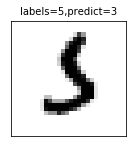

In [54]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)